<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-algaher0805/blob/main/curso2_m%C3%B3dulo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with Python, IBM.

##Módulo 5

###Alejandro García Hernández

###A01793812

En este modulo se habla de: 
- Evaluación del modelo
- Sobre-ajuste
- sub-ajuste
- Selección de modelo 
- Regresión "Ridge" 
- búsqueda en cuadrícula (grid search)

# Evaluación del modelo

En el módulo anterior se vio como entrenar un modelo y obtener los datos modelados de la variable objetivo para así compararlos vs los datos originales. Sin embargo haciendolo de esta manera, es decir, con entrenar y validar los datos con el mismo conjunto, corremos el riesgo de que el modelo simplemente se haya aprendido los datos y no este pronosticando adecuadamente.

Para evitar esto, es conveniente dividir nuestro conjunto de datos en dos sub-conjuntos, uno de entrenamiento y uno de pruebas

In [1]:
#Se definen las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.preprocessing import PolynomialFeatures

from tqdm import tqdm


In [2]:
#se obtienen los datos
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
#se divide el df en el conjunto de entrada y salida
Y = df['price']
X = df.drop('price',axis=1)

In [4]:
#se obtiene un conjunto de entrenamiento con el 90% de los datos y otro de pruebas con el 10% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1 ,random_state=1)

In [5]:
#generamos el objeto
lr = LinearRegression()

#para este ejemplo usaremos solo la variable horsepower como variable independiente
lr.fit(X_train[['horsepower']], y_train)

#observamos los scores obtenidos con el conjunto de entrenamiento y el de validación

print("el valor de R2 para el conjunto de entrenamiento es: ",round(lr.score(X_train[['horsepower']], y_train),3))

print("el valor de R2 para el conjunto de validación es: ",round(lr.score(X_test[['horsepower']], y_test),3))

el valor de R2 para el conjunto de entrenamiento es:  0.662
el valor de R2 para el conjunto de validación es:  0.364


Observamos que el valor de la R2 es mucho más pequeño en el conunto de validación, esto muchas veces se debe a que no tenemos suficientes datos para la valicación.

Si entrenamos el modelo con X_train y evaluamos el error obtenemos el resultado a1, si comenzamos a jugar con diferentes conjuntos de entrenamiento y prueba podremos ver que se obtienen diferentes resultados. Para tener entonces un mejor resultado se utiliza el método de validación cruzada, este método parte el conjunto de entrenamiento en k partes iguales, utiliza una de esas k partes para realizar el test y las k-1 partes restantes para pruebas. Este proceso se repite hasta cada una de las k partes ha sido utilizada como conjunto de pruebas y finalmente el resultado es el promedio de los k pasos. 

In [6]:
# se realiza una validación cruzada partiendo el conjunto original en 4 partes iguales y utilizando el modelo de regresión que se había definido antes
Rcross = cross_val_score(lr, X[['horsepower']], Y, cv=4)

# Y se saca la media y desviación de estos indicadores
print("la media de las particiones es: ", round(Rcross.mean(),3), "y la desviación es: " , round(Rcross.std(),3))

la media de las particiones es:  0.522 y la desviación es:  0.291


# Sobre-ajuste, sub-ajuste y selección del modelo

Cuando estamos intentando ajustar nuestros datos a un modelo, el reto es elegir cuál modelo es el óptimo, por ejemplo, si tenemos una función polinomial y queremos predecirla con una relación líneal, esta no es lo suficientemente compleja y como resultado obtendremos muchos errores, es decir, el modelo está **sub-ajustado**, es decir, es demasiado simple para predecir los datos. Parecería que el problema podría resolverse al incrementar el grado del polinomio para predecir los datos, y así es, pero teniendo cuidado en no elevarlo demasiado ya que entonces el modelo podría estar intentando predecir también el ruido, lo que da lugar al **sobre-ajuste**. 

In [7]:
#Como ejemplo veamos como ajuste una regresión líneal múltiple a nuestros datos
lr = LinearRegression()
lr.fit(X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


#obtenemos las estimaciones con los conjuntos de entrenmiento y pruebas
yhat_train = lr.predict(X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

yhat_test = lr.predict(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


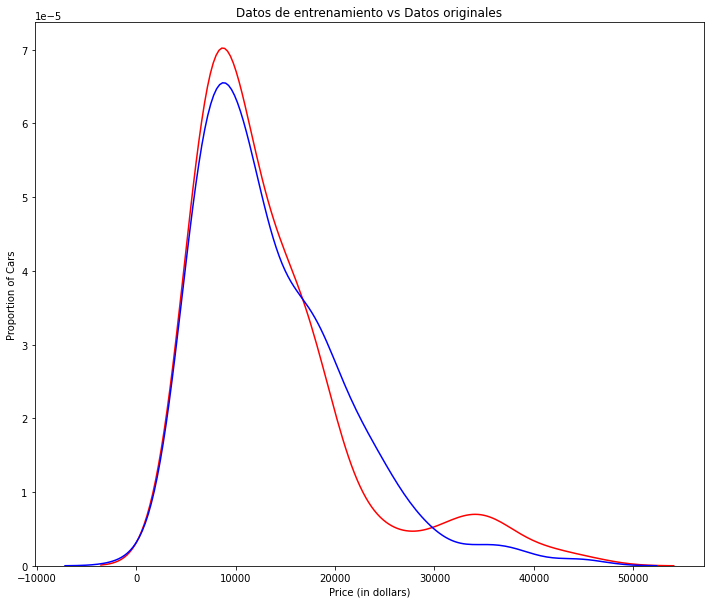

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


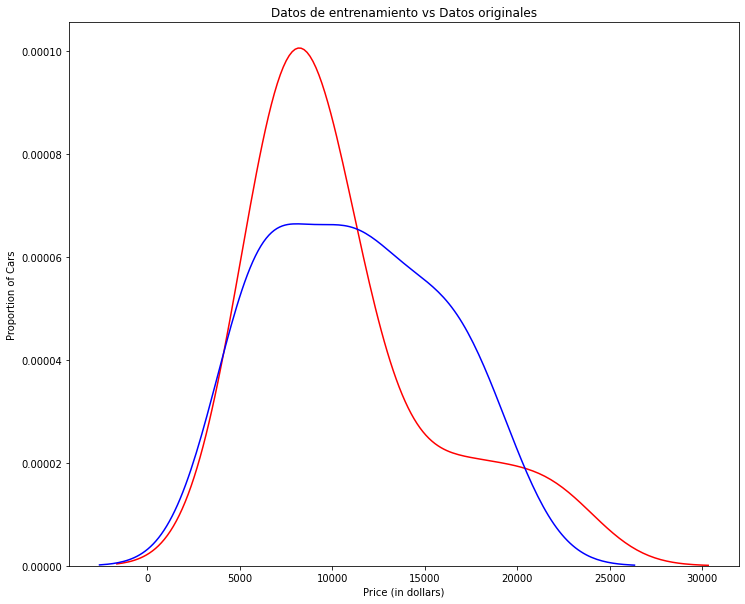

In [9]:

#graficamos para comparar los comportamientos
Title = 'Datos de entrenamiento vs Datos originales'

DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Es muy evidente que los datos de entrenamiento ajustan mucho mejor que los datos de prueba, por lo que el modelo está sub-ajustado.

In [10]:
#veamos ahora como se comporta un modelo polinomial utilizando un conjunto del 55% para entrenamiento

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=0)

In [11]:
#Transformamos los datos a un polinomo de grado 5
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

#creamos el objeto regresión lineal
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

#Predecimos los valores
yhat = poly.predict(x_test_pr)


In [12]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

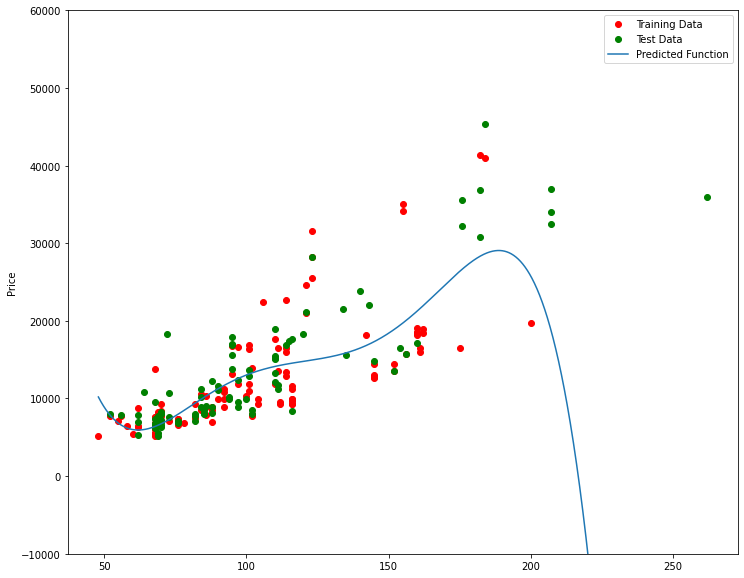

In [13]:
#graficamos las distribuciones
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Se observa que los datos ajustan bien hasta el valor de 200 pero a partir de ahí el modelo muestra una caida en el precio que predice.

In [14]:
print("el valor de R2 para los datos de entrenamineto es: ", round(poly.score(x_train_pr, y_train),3))
print("el valor de R2 para los datos de prueba es: ", round(poly.score(x_test_pr, y_test),3))

el valor de R2 para los datos de entrenamineto es:  0.557
el valor de R2 para los datos de prueba es:  -29.871


Se observa que el valor de R2 para el conjunto de entrenamiento es de 55% pero en el conjunto de prueba es negativo, esto es un indicador de **sobre-ajuste**. Para poder elegir el grado adecuado del polinomio debemos evaluar la R2 obtenida para diferentes grados.

Text(3, 0.75, 'Maximum R^2 ')

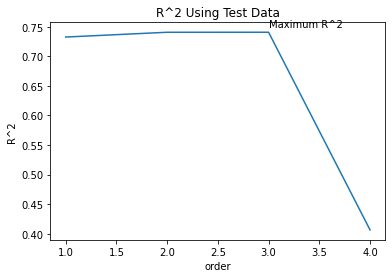

In [15]:
#creamos una lista para almacenar los resultados
Rsqu_test = []

#se probaran polinomios de grado 1 a 4
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

En la gráfica anterior se observa que el polinomio de grado 3 es el que obtiene una mejor R2, y después de ahí cae.

# Regresión "Ridge" 

La Regresión "Ridge" sirve para evitar el sobre-entrenamiento, esto es mediante el parámetro alpha de la función que va castigando el valor de los parámetros estimados en el modelo.

In [16]:
#supongamos ahora que ajustamos nuestros datos a un polinomio de segundo grado
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

#generamos el objeto de la regresión ridge
RigeModel=Ridge(alpha=1)

#entrenamos el modelo y obtenemos las predicciones
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

In [17]:
#ahora vemos la manera de obtener el valor de alpha que minimiza el error en la prueba de error

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 127.27it/s, Test Score=0.564, Train Score=0.859]


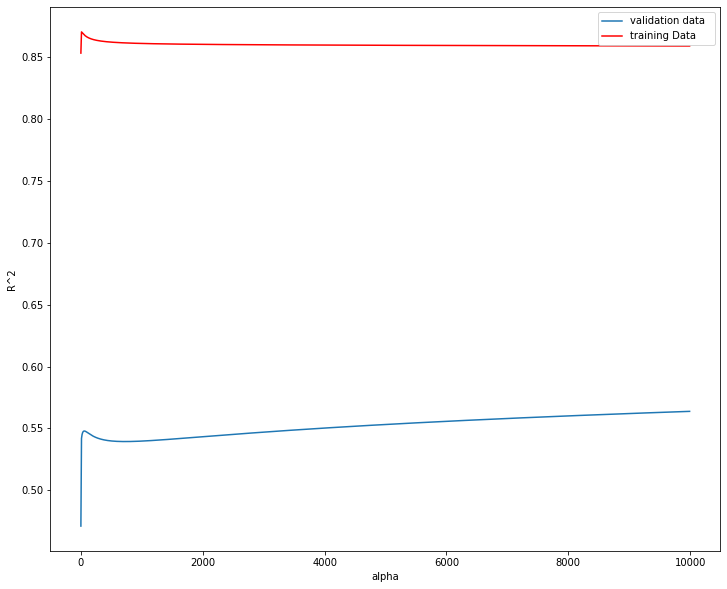

In [18]:
#graficamos los resultados
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Observamos que entre más grande es el valor de alpha el valor de R2 aumenta en el conjunto de validación y de hecho la R2 comienza a estabilizarse, por otro lado vemos que en el conjunto de prueba la R2 no aumenta, de hecho decrece, esto se debe a la naturaleza de la regresión Ridge que evita el sobre-ajuste.

# búsqueda en cuadrícula (grid search)

Está técnica es extremadamente útil ya que permite encontrar los hiperparámetros del modelo con los cuales el error se minimiza. En términos generales, usando validación cruzada sobre el conjunto de entrenamiento y validación, grid seach entrena n modelos utilizando diferentes combinaciones de los hiperparámetros y al final se obtienen aquellos que minimicen el error.

In [22]:
#primero definimos un diccionario con los parámetros y sus valores que queremos evaluar

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#definimos el objeto para la regresión
RR=Ridge()

# definimos la búsqueda la cuál se realizará partiendo el conjunto que se ingrese en 4 partes iguales. 
Grid1 = GridSearchCV(RR, parameters1,cv=4)

#buscamos los valores intentando predecir los precios usando 4 variables
Grid1.fit(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], Y)

#y finalmente observamos el resultado
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

El resultado nos dice que el valor de alpha con el que obtenemos una mejor R2 es con el valor de 10,000

In [24]:
#Finalmente probamos el modelo con el conjunto de prueba y el parámetro de alpha encontrado
round(BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test),3)

0.841

Y observamos que obtenemos un R2 de 84% con el conjunto de pruebas.

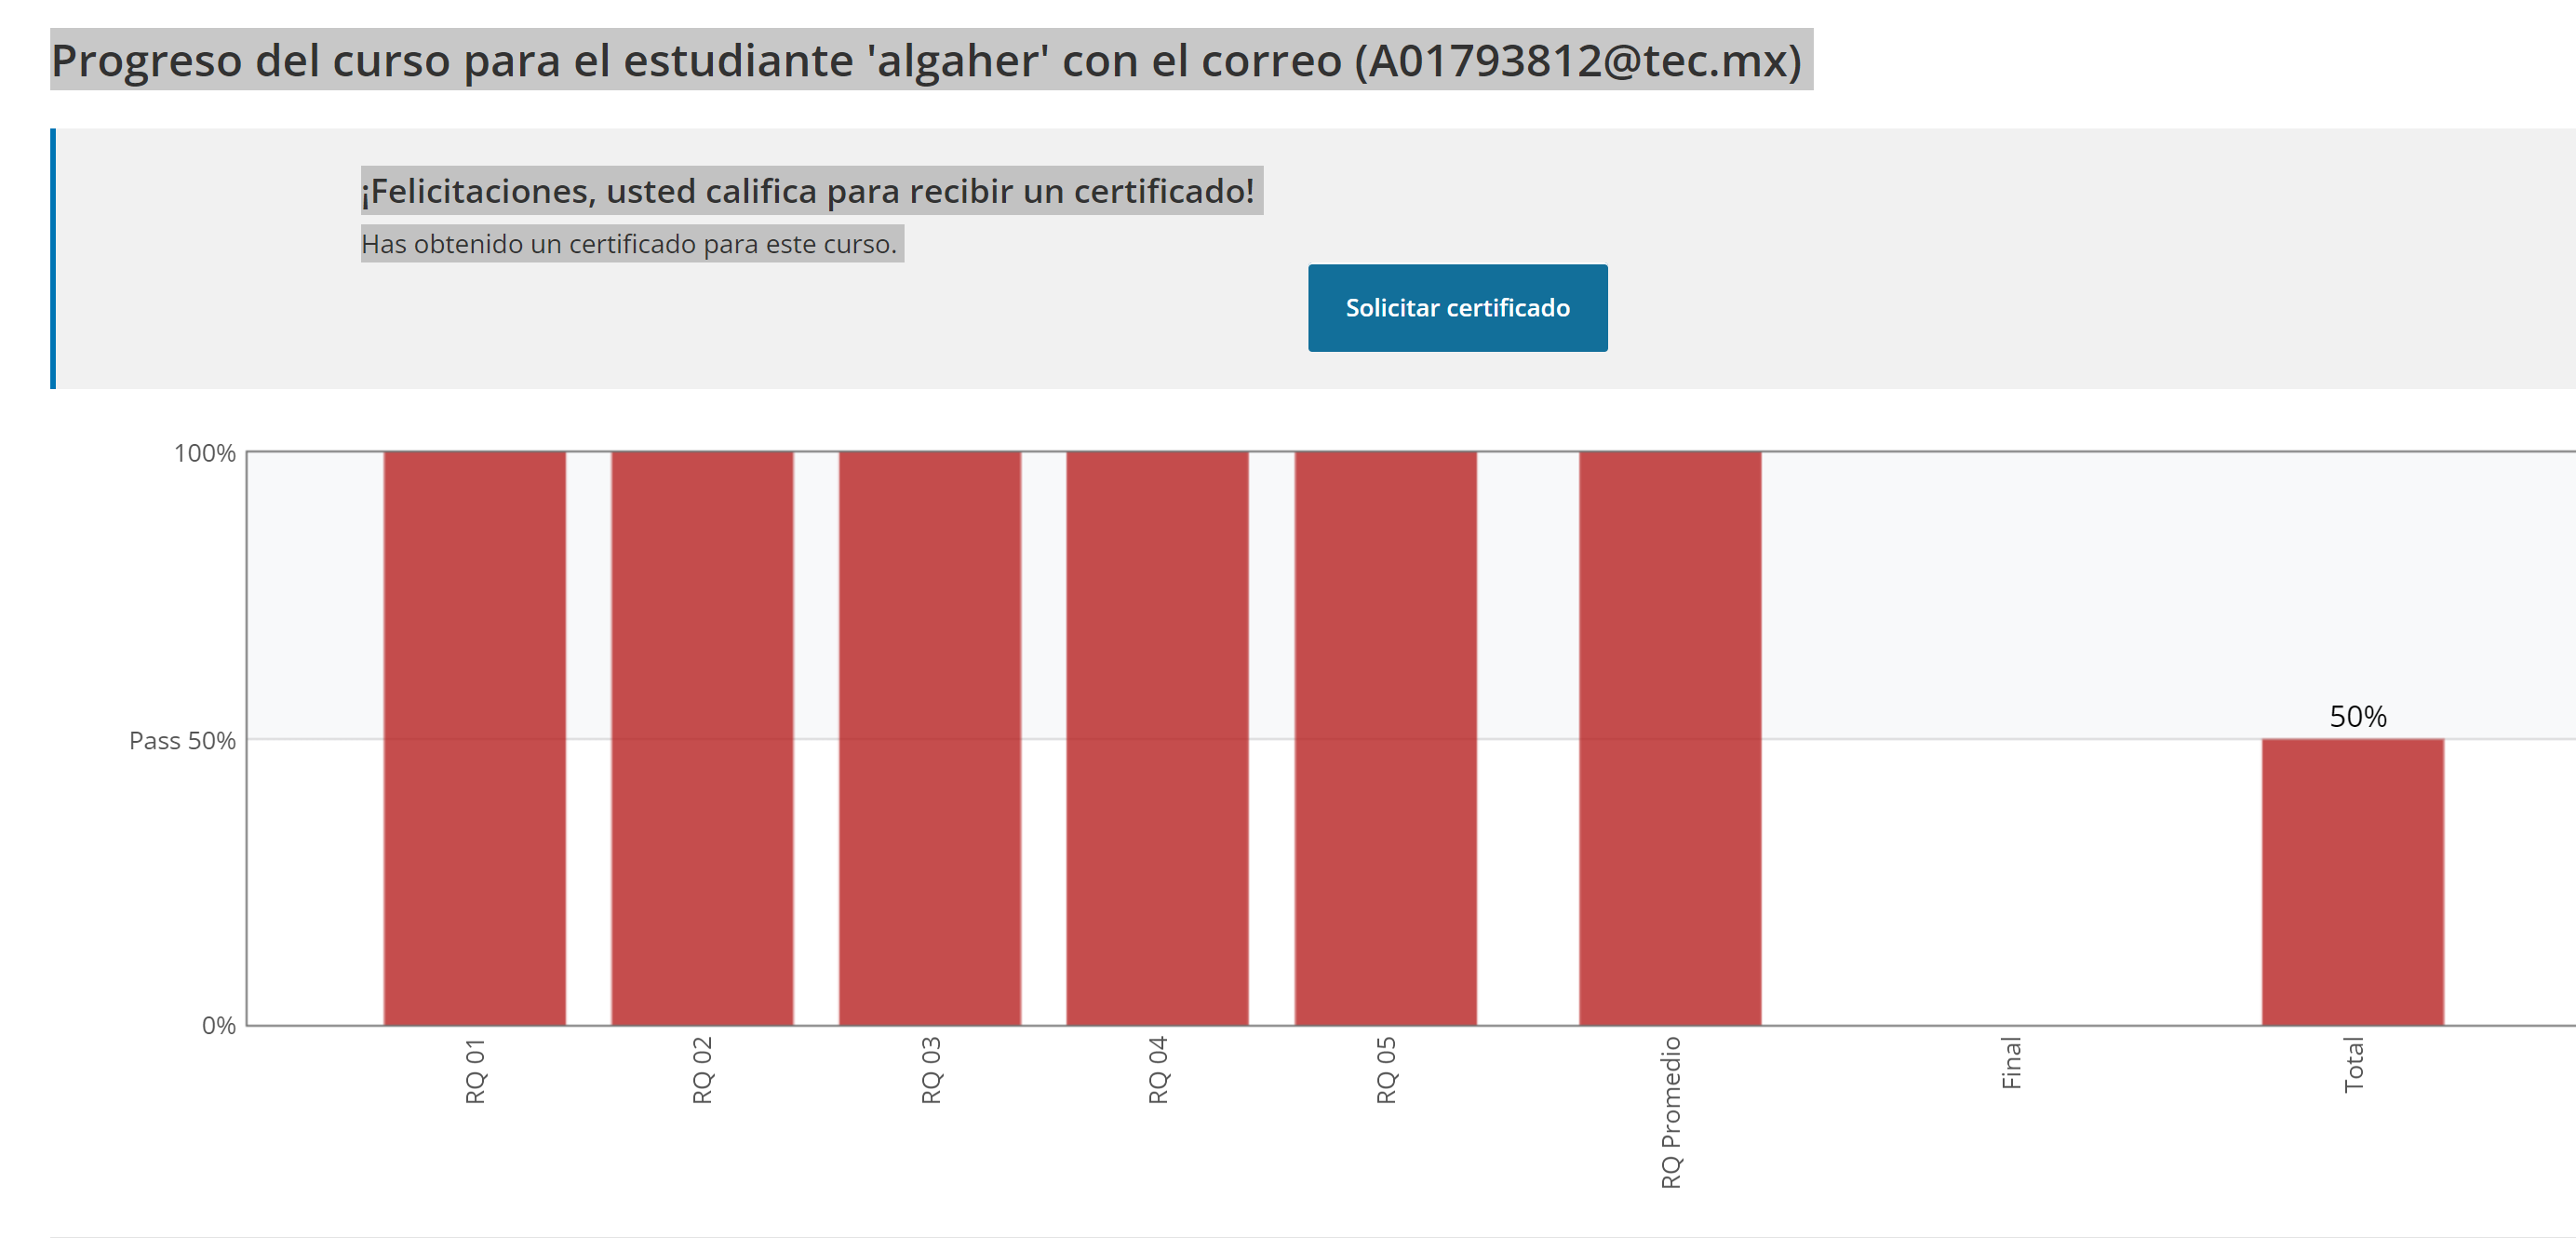